In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
file_path = 'Downloads/Epilepsy_Funding_Master.xlsx'
epilepsy_data = pd.read_excel(file_path, sheet_name='Epilepsy')
epilepsy_data.head()




,Category,FY,Funding_IC,Project_Number,Project_Title,PI_Name,Org_Name,State_Country,Amount
0,Epilepsy,2023,NINDS,5R01NS100947-06,Inflammatory regulation of neurotrophin signal...,"JIANG, JIANXIONG",UNIVERSITY OF TENNESSEE HEALTH SCI CTR,TN,332500
1,Epilepsy,2023,NINDS,5R01NS079507-09,Novel Therapeutic Strategies to Resolve Neurov...,"BAUER, BJOERN",UNIVERSITY OF KENTUCKY,KY,561713
2,Epilepsy,2023,NINDS,5F32NS116416-03,Closed-Loop Control of Dentate Inhibitory Timi...,"CHRISTENSON WICK, ZOÉ",ICAHN SCHOOL OF MEDICINE AT MOUNT SINAI,NY,42092
3,Epilepsy,2023,NINDS,5U44NS121559-02,Epilepsy Seizure Detection with Innovative Tri...,"BESIO, WALTER",CREMEDICAL CORPORATION,RI,543470
4,Epilepsy,2023,NINDS,5U01NS114042-02,Pediatric Dose Optimization for Seizures in EM...,"SHAH, MANISH",BAYLOR COLLEGE OF MEDICINE,TX,2947438


In [48]:
# Data Cleaning
# Drop rows with missing Amount values
epilepsy_data.dropna(subset=['Amount'], inplace=True)




In [49]:
epilepsy_data = epilepsy_data.iloc[1:]
print(epilepsy_data.columns)


Index(['Category', 'FY', 'Funding_IC', 'Project_Number', 'Project_Title',
       'PI_Name', 'Org_Name', 'State_Country', 'Amount'],
      dtype='object')


In [50]:
# Convert Amount to numeric
epilepsy_data['Amount'] = pd.to_numeric(epilepsy_data['Amount'], errors='coerce')



In [51]:
# Descriptive Statistics
# Summary statistics
summary_stats = epilepsy_data.describe()

# Total funding by year
total_funding_by_year = epilepsy_data.groupby('FY')['Amount'].sum().reset_index()
print(total_funding_by_year)

# Funding distribution by institution
funding_by_institution = epilepsy_data.groupby('Org_Name')['Amount'].sum().reset_index()
print(funding_by_institution)



     FY     Amount
0  2019  187662561
1  2020  198102266
2  2021  217999138
3  2022  226086267
4  2023  244821321
                                Org_Name    Amount
0                         AGENEBIO, INC.   1595216
1                 ALBANY MEDICAL COLLEGE   2096819
2        ALBANY MOLECULAR RESEARCH, INC.   2873137
3    ALBERT EINSTEIN COLLEGE OF MEDICINE   6443153
4                                ALCORIX    903957
..                                   ...       ...
216                WASHINGTON UNIVERSITY   2517201
217               WAYNE STATE UNIVERSITY   7030917
218   WEILL MEDICAL COLL OF CORNELL UNIV   3120144
219              WRIGHT STATE UNIVERSITY    164997
220                      YALE UNIVERSITY  26710349

[221 rows x 2 columns]


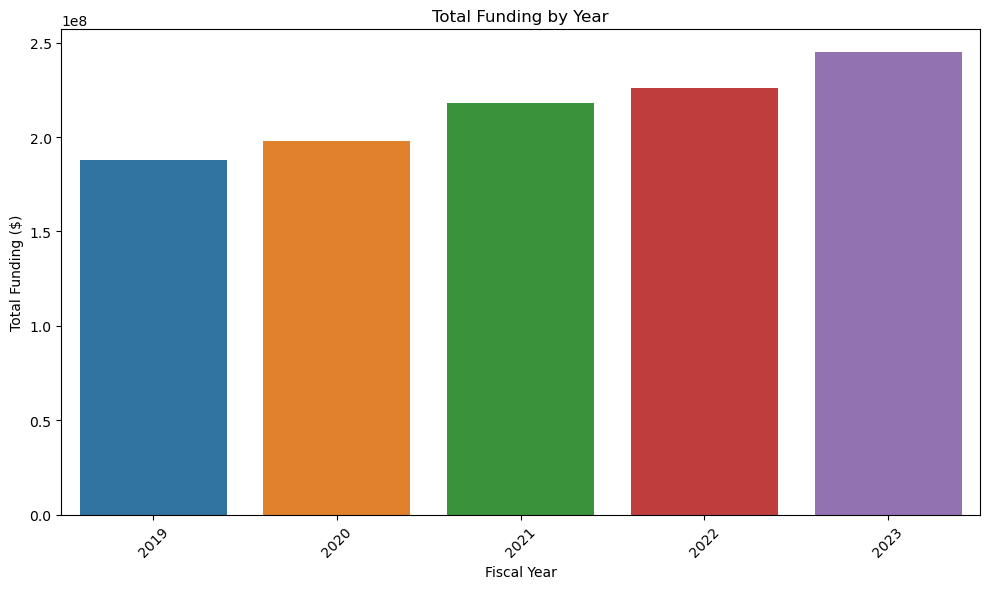

In [52]:
# Visualizations
# Total Funding by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='FY', y='Amount', data=total_funding_by_year)
plt.title('Total Funding by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_funding_by_year.png')
plt.show()



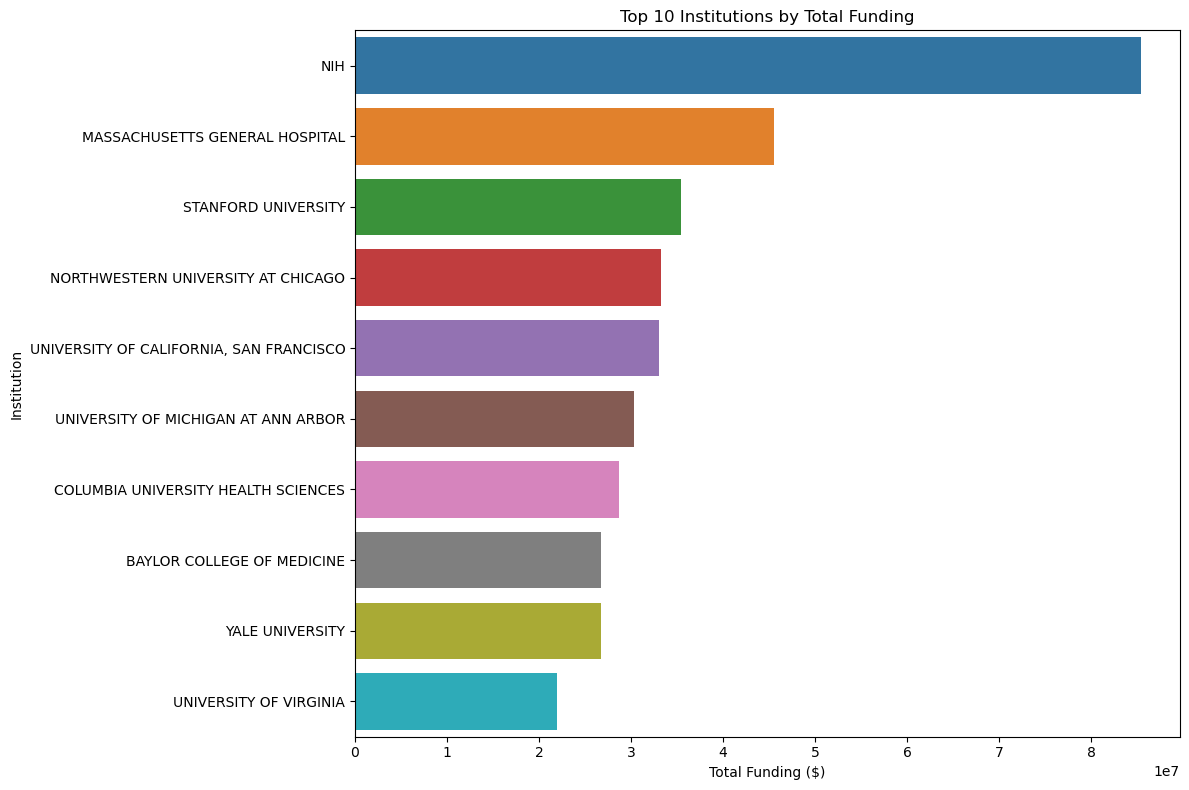

In [53]:
# Funding Distribution by Institution
plt.figure(figsize=(12, 8))
top_institutions = funding_by_institution.sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Amount', y='Org_Name', data=top_institutions)
plt.title('Top 10 Institutions by Total Funding')
plt.xlabel('Total Funding ($)')
plt.ylabel('Institution')
plt.tight_layout()
plt.savefig('funding_by_institution.png')
plt.show()



In [54]:
# Regression Analysis
# Prepare data for regression
epilepsy_data['State_Country'] = epilepsy_data['State_Country'].astype('category')
epilepsy_data['PI_Name'] = epilepsy_data['PI_Name'].astype('category')
epilepsy_data['Org_Name'] = epilepsy_data['Org_Name'].astype('category')

# Encode categorical variables
epilepsy_data = pd.get_dummies(epilepsy_data, columns=['State_Country', 'PI_Name', 'Org_Name'], drop_first=True)

# Define independent variables (X) and dependent variable (y)
X = epilepsy_data.drop(columns=['Amount', 'Category', 'FY', 'Funding_IC', 'Project_Number', 'Project_Title'])
y = epilepsy_data['Amount']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     5.299
Date:                Mon, 20 May 2024   Prob (F-statistic):          2.35e-186
Time:                        20:05:33   Log-Likelihood:                -35417.
No. Observations:                2553   AIC:                         7.247e+04
Df Residuals:                    1737   BIC:                         7.724e+04
Df Model:                         815                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [55]:
# Save summary statistics and regression results to files
summary_stats.to_csv('downloads/summary_statistics.csv')
total_funding_by_year.to_csv('downloads/total_funding_by_year.csv', index=False)
funding_by_institution.to_csv('downloads/funding_by_institution.csv', index=False)

# Save regression results to a text file
with open('regression_results.txt', 'w') as f:
    f.write(model.summary().as_text())

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = 'Downloads/Epilepsy_Funding_Master.xlsx'
epilepsy_data = pd.read_excel(file_path, sheet_name='Epilepsy')

# Rename columns for easier access (adjust these names based on your dataset)
epilepsy_data.columns = [
    'Category', 'FY', 'Funding_IC', 'Project_Number', 'Project_Title',
    'PI_Name', 'Org_Name', 'State_Country', 'Amount'
]

# Drop rows with missing Amount values
epilepsy_data.dropna(subset=['Amount'], inplace=True)

# Convert Amount to numeric
epilepsy_data['Amount'] = pd.to_numeric(epilepsy_data['Amount'], errors='coerce')

# Drop rows with any missing values
epilepsy_data.dropna(inplace=True)

# Display the first few rows to understand the structure
print(epilepsy_data.head())


   Category    FY Funding_IC   Project_Number  \
0  Epilepsy  2023      NINDS  5R01NS100947-06   
1  Epilepsy  2023      NINDS  5R01NS079507-09   
2  Epilepsy  2023      NINDS  5F32NS116416-03   
3  Epilepsy  2023      NINDS  5U44NS121559-02   
4  Epilepsy  2023      NINDS  5U01NS114042-02   

                                       Project_Title                PI_Name  \
0  Inflammatory regulation of neurotrophin signal...       JIANG, JIANXIONG   
1  Novel Therapeutic Strategies to Resolve Neurov...          BAUER, BJOERN   
2  Closed-Loop Control of Dentate Inhibitory Timi...  CHRISTENSON WICK, ZOÉ   
3  Epilepsy Seizure Detection with Innovative Tri...          BESIO, WALTER   
4  Pediatric Dose Optimization for Seizures in EM...           SHAH, MANISH   

                                  Org_Name State_Country   Amount  
0   UNIVERSITY OF TENNESSEE HEALTH SCI CTR            TN   332500  
1                   UNIVERSITY OF KENTUCKY            KY   561713  
2  ICAHN SCHOOL OF MEDICIN

In [6]:
# Total funding by year
total_funding_by_year = epilepsy_data.groupby('FY')['Amount'].sum().reset_index()
print("Total Funding by Year:\n", total_funding_by_year)

# Funding distribution by institution
funding_by_institution = epilepsy_data.groupby('Org_Name')['Amount'].sum().reset_index()
print("Funding Distribution by Institution:\n", funding_by_institution)

# Project funding details
project_funding_details = epilepsy_data[['Project_Title', 'PI_Name', 'Org_Name', 'Amount']]
print("Project Funding Details:\n", project_funding_details.head())


Total Funding by Year:
      FY     Amount
0  2019  176413743
1  2020  185892652
2  2021  196760789
3  2022  205461814
4  2023  224955921
Funding Distribution by Institution:
                                 Org_Name    Amount
0                         AGENEBIO, INC.   1595216
1                 ALBANY MEDICAL COLLEGE   2096819
2        ALBANY MOLECULAR RESEARCH, INC.   2873137
3    ALBERT EINSTEIN COLLEGE OF MEDICINE   6443153
4                                ALCORIX    903957
..                                   ...       ...
215                WASHINGTON UNIVERSITY   2517201
216               WAYNE STATE UNIVERSITY   7030917
217   WEILL MEDICAL COLL OF CORNELL UNIV   3120144
218              WRIGHT STATE UNIVERSITY    164997
219                      YALE UNIVERSITY  26710349

[220 rows x 2 columns]
Project Funding Details:
                                        Project_Title                PI_Name  \
0  Inflammatory regulation of neurotrophin signal...       JIANG, JIANXIONG   
1  N

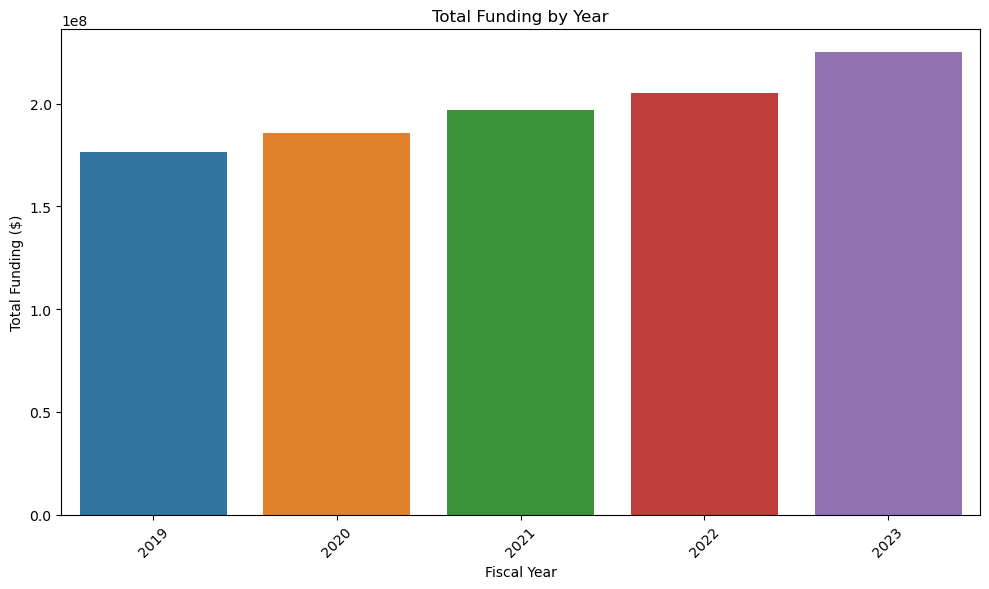

In [7]:
# Total Funding by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='FY', y='Amount', data=total_funding_by_year)
plt.title('Total Funding by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_funding_by_year.png')
plt.show()


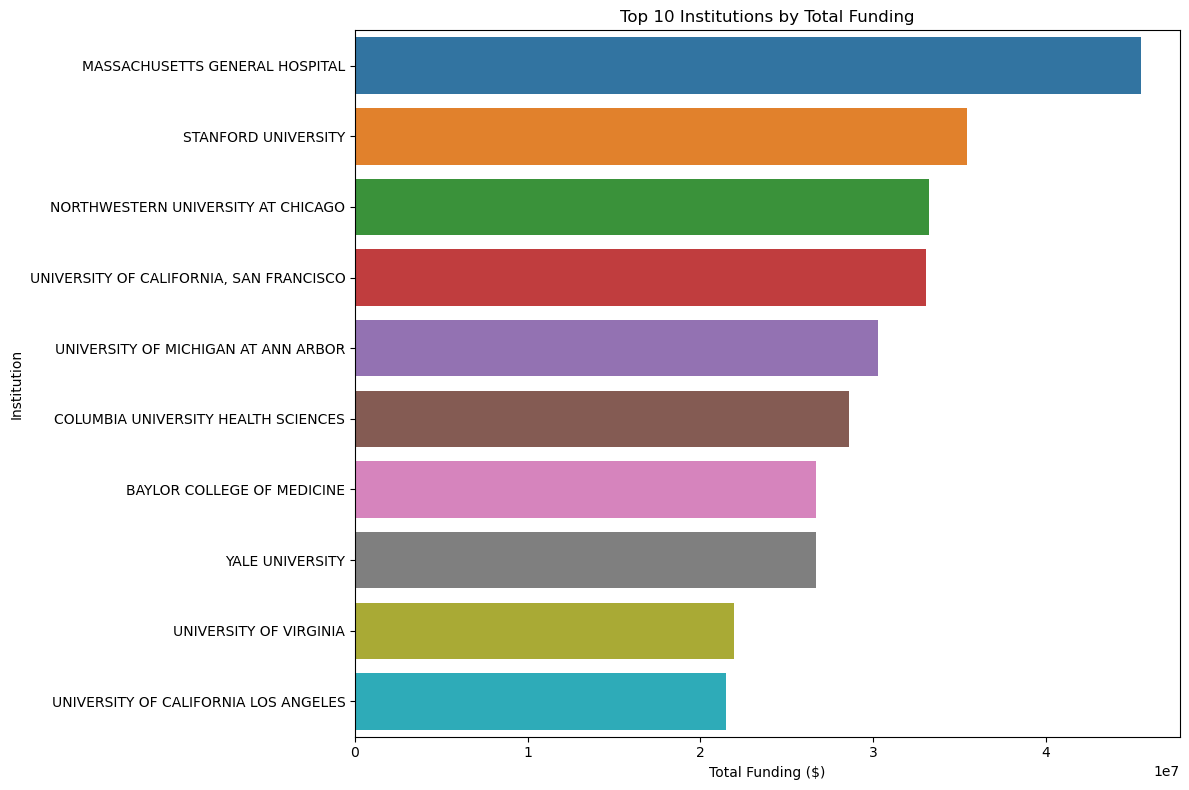

In [8]:
# Funding Distribution by Institution
plt.figure(figsize=(12, 8))
top_institutions = funding_by_institution.sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Amount', y='Org_Name', data=top_institutions)
plt.title('Top 10 Institutions by Total Funding')
plt.xlabel('Total Funding ($)')
plt.ylabel('Institution')
plt.tight_layout()
plt.savefig('funding_by_institution.png')
plt.show()


/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/3869819996.py:7: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/3869819996.py:7: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/3869819996.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/3869819996.py:8: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig('project_funding_details.png')
/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/3869819996.py:8: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.savefig('project_funding_details.png')
/Users/prateekpandey/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools

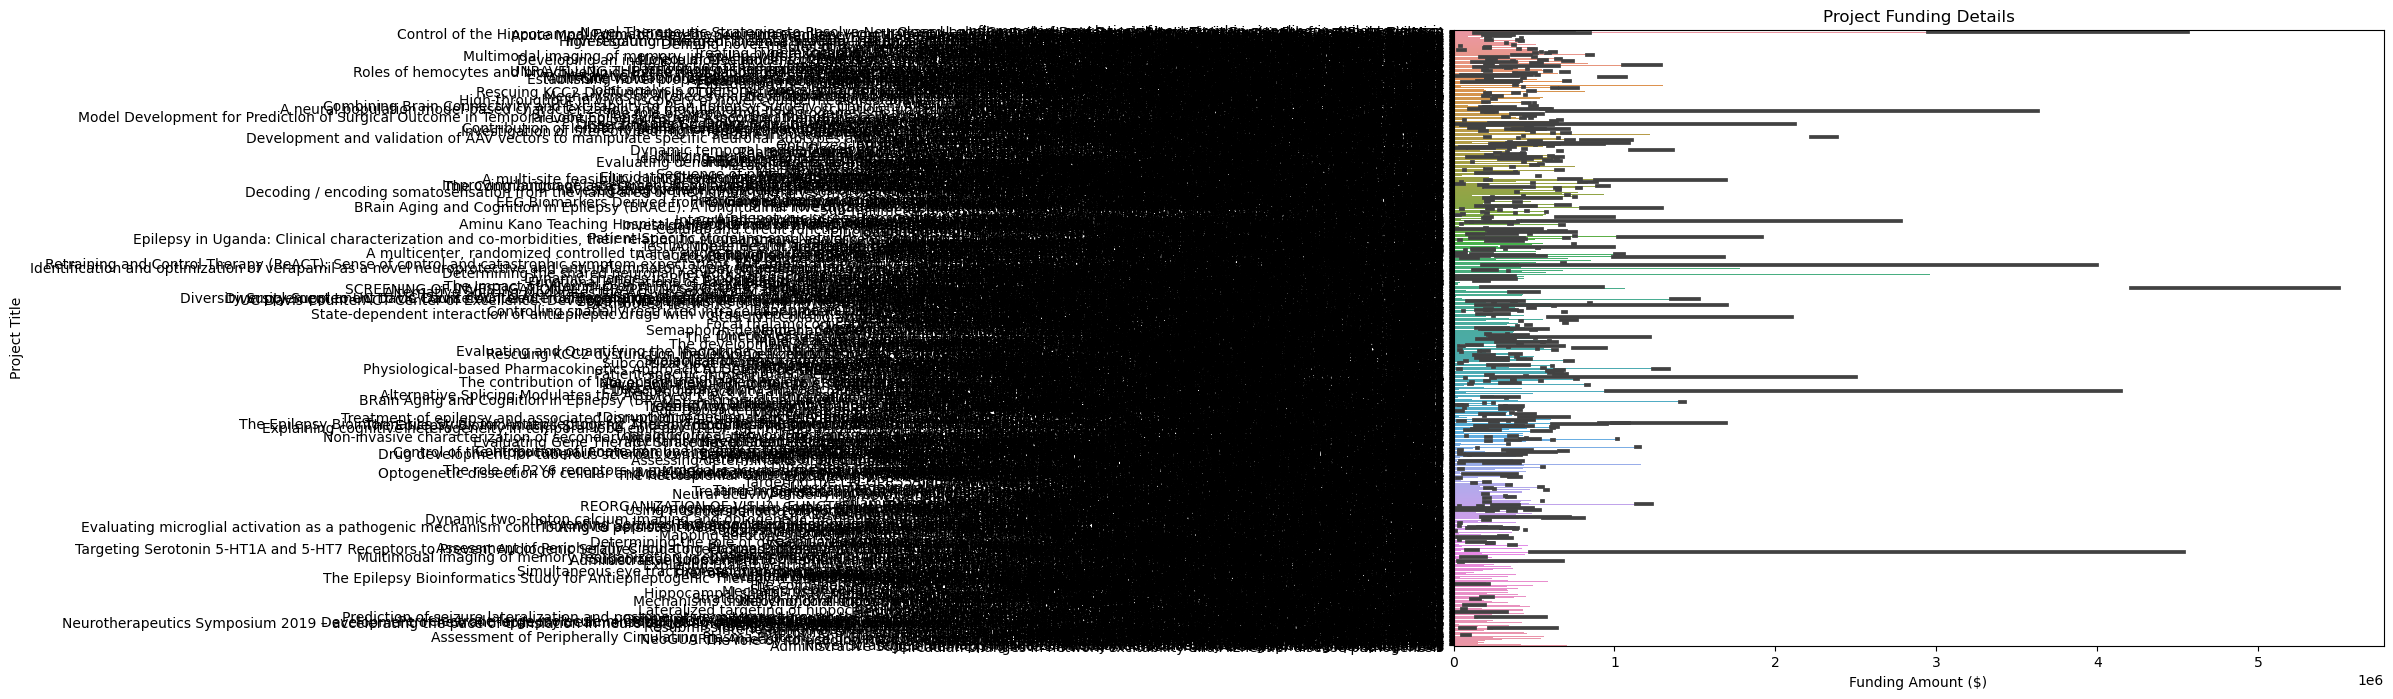

In [9]:
# Project Funding Details
plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='Project_Title', data=project_funding_details)
plt.title('Project Funding Details')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Project Title')
plt.tight_layout()
plt.savefig('project_funding_details.png')
plt.show()


/var/folders/lq/x09m7_kd5rxgbtqp_sxbq3380000gn/T/ipykernel_3991/1568907556.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_funding_with_forecast = total_funding_by_year.append({'FY': 2024, 'Amount': predicted_funding_2024}, ignore_index=True)


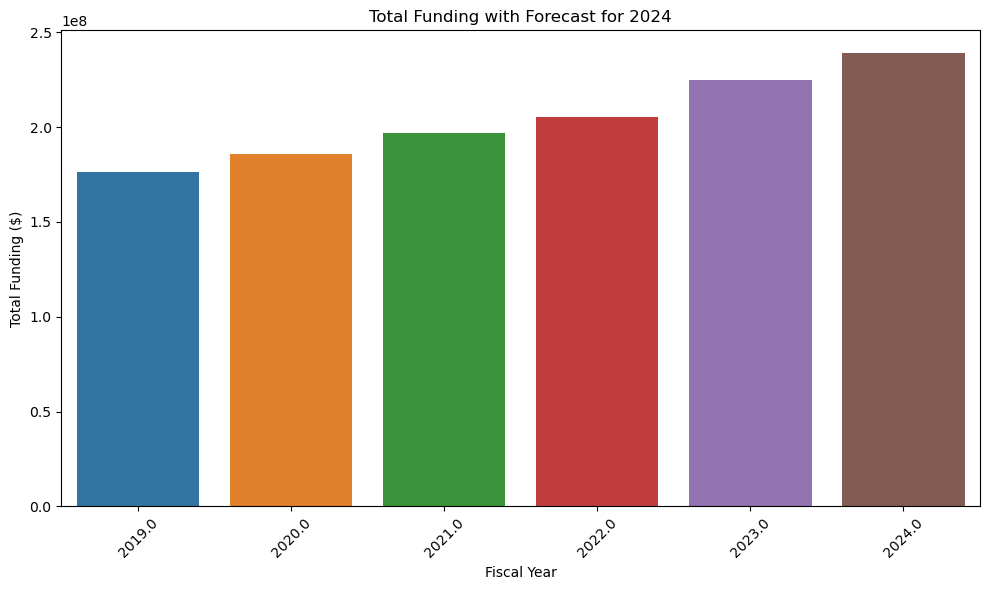

In [10]:
# For simplicity, let's use the average growth rate of funding to predict the next year
# Calculate the growth rate
total_funding_by_year['Growth_Rate'] = total_funding_by_year['Amount'].pct_change()
average_growth_rate = total_funding_by_year['Growth_Rate'].mean()

# Predict the funding for 2024
latest_funding = total_funding_by_year.iloc[-1]['Amount']
predicted_funding_2024 = latest_funding * (1 + average_growth_rate)

# Create a DataFrame for the forecast
forecast_2024 = pd.DataFrame({
    'FY': [2024],
    'Predicted_Funding': [predicted_funding_2024]
})

# Append the forecast to the existing total funding DataFrame
total_funding_with_forecast = total_funding_by_year.append({'FY': 2024, 'Amount': predicted_funding_2024}, ignore_index=True)

# Plot the forecast
plt.figure(figsize=(10, 6))
sns.barplot(x='FY', y='Amount', data=total_funding_with_forecast)
plt.title('Total Funding with Forecast for 2024')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('funding_forecast_2024.png')
plt.show()


In [12]:
# Print the summary statistics and regression results

# Total funding by year
print("Total Funding by Year:\n", total_funding_by_year)

# Funding distribution by institution
print("Funding Distribution by Institution:\n", funding_by_institution)

# Project funding details
print("Project Funding Details:\n", project_funding_details.head())

# Forecast for 2024
print("Forecast for 2024:\n", forecast_2024)


Total Funding by Year:
      FY     Amount  Growth_Rate
0  2019  176413743          NaN
1  2020  185892652     0.053731
2  2021  196760789     0.058465
3  2022  205461814     0.044221
4  2023  224955921     0.094879
Funding Distribution by Institution:
                                 Org_Name    Amount
0                         AGENEBIO, INC.   1595216
1                 ALBANY MEDICAL COLLEGE   2096819
2        ALBANY MOLECULAR RESEARCH, INC.   2873137
3    ALBERT EINSTEIN COLLEGE OF MEDICINE   6443153
4                                ALCORIX    903957
..                                   ...       ...
215                WASHINGTON UNIVERSITY   2517201
216               WAYNE STATE UNIVERSITY   7030917
217   WEILL MEDICAL COLL OF CORNELL UNIV   3120144
218              WRIGHT STATE UNIVERSITY    164997
219                      YALE UNIVERSITY  26710349

[220 rows x 2 columns]
Project Funding Details:
                                        Project_Title                PI_Name  \
0  In